## Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## AWS Defense Evasion Impair Security Services

In [12]:
import pandas as pd

df = pd.read_csv('AwsApiCallX.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[df['eventName'].isin(['DeleteAlarms', 'DeleteTags', 'DeleteMetricFilter', 'DeletePolicyVersion', 'DeleteChangeSet', 'DeleteRolePolicy', 'DeleteLogGroup', 'AdminDeleteUser', 'DeleteTable', 'DeleteNetworkInterface', 'DeleteWebACL', 'DeleteRule', 'DeleteRuleGroup', 'DeleteLoggingConfiguration'])]
filtered_logs['eventTime'] = pd.to_datetime(filtered_logs['eventTime'])

# Aggregate stats
stats = filtered_logs.groupby(['eventSource', 'sourceIPAddress', 'userAgent', 'errorCode']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max'),
    eventName=pd.NamedAgg(column='eventName', aggfunc='unique')
).reset_index()

stats

,eventSource,sourceIPAddress,userAgent,errorCode,count,firstTime,lastTime,eventName
0,ec2.amazonaws.com,appstream.amazonaws.com,appstream.amazonaws.com,Client.InvalidNetworkInterface.InUse,3,2024-05-03 20:11:41+00:00,2024-05-03 21:06:43+00:00,[DeleteNetworkInterface]
1,ec2.amazonaws.com,glue.amazonaws.com,glue.amazonaws.com,Client.InvalidNetworkInterface.InUse,13,2024-05-03 19:45:19+00:00,2024-05-03 23:08:52+00:00,[DeleteNetworkInterface]
2,ec2.amazonaws.com,glue.amazonaws.com,glue.amazonaws.com,Client.InvalidNetworkInterfaceID.NotFound,92,2024-05-03 20:10:21+00:00,2024-05-03 23:09:55+00:00,[DeleteNetworkInterface]
3,ec2.amazonaws.com,glue.amazonaws.com,glue.amazonaws.com,Client.InvalidParameterValue,673,2024-05-03 19:33:23+00:00,2024-05-03 23:22:41+00:00,[DeleteNetworkInterface]


In [3]:
df = pd.read_csv('CreateTask.csv')
df.columns

Index(['eventCategory', 'eventName', 'eventSource', 'eventTime', 'eventType',
       'recipientAccountId', 'sessionCredentialFromConsole', 'sourceIPAddress',
       'timestamp', 'userAgent', 'event.dataset',
       'requestParameters.cloudWatchLogGroupArn',
       'requestParameters.destinationLocationArn',
       'requestParameters.excludes', 'requestParameters.includes',
       'requestParameters.name', 'requestParameters.options.logLevel',
       'requestParameters.options.verifyMode',
       'requestParameters.schedule.scheduleExpression',
       'requestParameters.sourceLocationArn', 'requestParameters.tags',
       'responseElements.taskArn', 'service.type', 'userIdentity.accessKeyId',
       'userIdentity.accountId', 'userIdentity.arn',
       'userIdentity.principalId',
       'userIdentity.sessionContext.attributes.mfaAuthenticated',
       'userIdentity.sessionContext.sessionIssuer.arn',
       'userIdentity.sessionContext.sessionIssuer.principalId',
       'userIdentity.sess

## Exfiltration via [DataSync Tasks](https://docs.aws.amazon.com/datasync/latest/userguide/API_Operations.html) (T1119: Automated Collection)

In [4]:
# Load the data
df = pd.read_csv('CreateTask.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[(df['eventName'] == 'CreateTask') & (df['eventSource'] == 'datasync.amazonaws.com')]
filtered_logs['eventTime'] = pd.to_datetime(filtered_logs['eventTime'])

filtered_logs['userIdentity.principalId'] = df['userIdentity.principalId'].str.split(':', expand=True)[1]

# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'eventName', 'requestParameters.destinationLocationArn', 'requestParameters.sourceLocationArn', 'userAgent', 'userIdentity.arn', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats

,sourceIPAddress,userIdentity.accountId,eventName,requestParameters.destinationLocationArn,requestParameters.sourceLocationArn,userAgent,userIdentity.arn,userIdentity.principalId,count,firstTime,lastTime
0,11.58.123.47,9.420000e+11,CreateTask,arn:aws:datasync:canada-central-3:777797188214...,arn:aws:datasync:canada-central-3:942097188214...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,arn:aws:sts::777797188214:assumed-role/AWSRese...,spiderman.admin@milkyway.ca,2,2024-05-17 12:53:38+00:00,2024-05-17 12:53:38+00:00
1,15.58.123.47,9.420000e+11,CreateTask,arn:aws:datasync:canada-central-3:942097188214...,arn:aws:datasync:canada-central-3:942097188214...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,arn:aws:sts::942097188214:assumed-role/AWSRese...,gohan.admin@milkyway.ca,5469,2024-05-17 12:53:38+00:00,2024-05-17 13:03:48+00:00


## AWS - GuardDuty Detector Resource Recon (T1619: Cloud Storage Object Discovery)

In [ ]:
# Load the data
df = pd.read_csv('Logs.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[(df['eventName'] == 'ListDetectors') & (~df['userIdentity.sessionContext.sessionIssuer.userName'].isin(['AWSServiceRoleForConfig', 'CloudGuard-Connect-RO-role']))]
filtered_logs['eventTime'] = pd.to_datetime(filtered_logs['eventTime'])

# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'userAgent', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats

## AWS - Publicly Exposed Database Instance (T1190: Exploit Public-Facing Application)

In [ ]:
# Load the data
df = pd.read_csv('Logs.csv')

# Convert field to boolean
df['responseElements.publiclyAccessible'] = df['responseElements.publiclyAccessible'].astype(bool)

# Filter the DataFrame based on required condition
filtered_logs = df[(df['eventName'] == 'ModifyDBInstance') & (~df['responseElements.publiclyAccessible'])]

# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'userAgent', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats

## AWS - IAM Policy Changes (T1484: Domain or Tenant Policy Modification)

In [ ]:
# Load the data
df = pd.read_csv('Logs.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[
    (df['eventName'].isin(['CreatePolicy', 'UpdatePolicy', 'DeletePolicy'])) &
    (df['eventSource'] == 'iam.amazonaws.com') &
    (~df['userIdentity.principalId'].str.contains(':AWSCloudFormation')) &
    (~df['userIdentity.sessionContext.sessionIssuer.userName'].str.startswith('AWSReservedSSO'))
]

# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'userAgent', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats

## AWS - Non MFA Management Console Login (T1556.006: Modify Authentication Process: Multi-Factor Authentication)

In [ ]:
# Load the data
df = pd.read_csv('Logs.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[(df['eventName'] == 'ConsoleLogin') &
                   ~(df['additionalEventData.MFAUsed'].eq('Yes') & df['responseElements.ConsoleLogin'].eq('Failure')) &
                   ~(df['userIdentity.sessionContext.sessionIssuer.userName'].str.startswith('AWSReservedSSO'))]

# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'userAgent', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats

## AWS CloudTrail Log Manipulation (T1562.001: Impair Defenses: Disable or Modify Tools)

In [ ]:
import pandas as pd
import re

# Load the data
df = pd.read_csv('Logs.csv')

# Filter the DataFrame based on required condition
filtered_logs = df[
    (df['eventName'].isin(['UpdateTrail', 'DeleteTrail', 'StopLogging', 'DeleteFlowLogs', 'DeleteEventBus', 'DeleteLogGroup'])) &
    (~df['userIdentity.sessionContext.sessionIssuer.userName'].str.startswith('AWSReservedSSO')) &
    (~df['sourceIPAddress'].str.contains('cloudformation\.amazonaws\.com')) &
    (~df['userIdentity.principalId'].str.contains('AMS-OsConfiguration')) &
    (~df['userAgent'].str.contains('console.amazonaws.com'))
]


# Aggregate stats
stats = filtered_logs.groupby(['sourceIPAddress', 'userIdentity.accountId', 'userAgent', 'userIdentity.principalId']).agg(
    count=pd.NamedAgg(column='eventTime', aggfunc='count'),
    firstTime=pd.NamedAgg(column='eventTime', aggfunc='min'),
    lastTime=pd.NamedAgg(column='eventTime', aggfunc='max')
).reset_index()

stats


## from AWS to AWWW

In [5]:
df = pd.read_csv('AWSApiCall.csv')
df.shape

(15225, 13)

In [6]:
df['accountId'] = df['userIdentity'].apply(lambda x: x.get('accountId') if isinstance(x, dict) else None)
df['invokedBy'] = df['userIdentity'].apply(lambda x: x.get('invokedBy') if isinstance(x, dict) else None)

df.shape

(15225, 13)

In [7]:
df['errorMessage'].unique()[:5]

array([nan,
       'User: son goku is not authorized to perform: xray:GetSamplingRules because no identity-based policy allows the xray:GetSamplingRules action',
       'The specified bucket does not have a website configuration',
       'The public access block configuration was not found',
       'Incorrect username or password.'], dtype=object)

Epoch 1/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0010 - val_loss: 0.9959
Epoch 2/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0009 - val_loss: 0.9958
Epoch 3/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0007 - val_loss: 0.9957
Epoch 4/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0005 - val_loss: 0.9957
Epoch 5/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0004 - val_loss: 0.9957
Epoch 6/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0004 - val_loss: 0.9956
Epoch 7/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0003 - val_loss: 0.9956
Epoch 8/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0002 - val_loss: 0.9956
Epoch 9/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0002 - val_loss: 0.9956
Epoch 10/50
381/381 [==============================] - 1s 2ms/step - loss: 1.0002 - val_loss: 0.9956

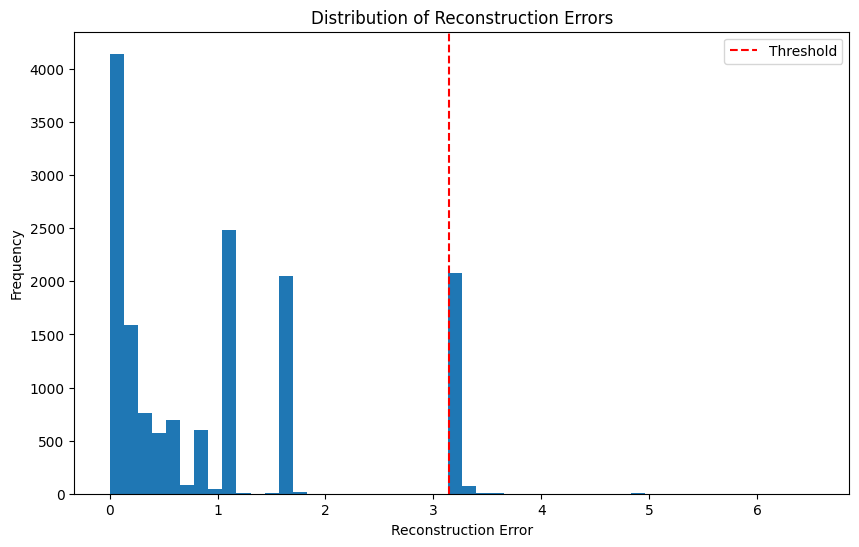

,eventName,eventSource,errorCode,accountId
10,UpdateInstanceInformation,ssm.amazonaws.com,NaN,8.970000e+11
26,Decrypt,kms.amazonaws.com,NaN,NaN
49,DescribeEventAggregates,health.amazonaws.com,NaN,8.970000e+11
106,DescribeStream,dynamodb.amazonaws.com,NaN,6.490000e+11
108,DescribeStream,dynamodb.amazonaws.com,NaN,6.490000e+11
...,...,...,...,...
15197,CreateLogStream,logs.amazonaws.com,NaN,8.970000e+11
15199,CreateLogStream,logs.amazonaws.com,NaN,8.970000e+11
15204,CreateLogStream,logs.amazonaws.com,NaN,8.970000e+11
15205,CreateLogStream,logs.amazonaws.com,NaN,8.970000e+11


In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense

df = pd.read_csv('AWSApiCall.csv')

features = ['errorCode', 'sourceIPAddress']

df_filtered = df[features]

# Fill missing values
df_filtered['errorCode'].fillna('NoError', inplace=True)
df_filtered['sourceIPAddress'].fillna('Unknown', inplace=True)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_filtered)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of neurons in the hidden layer

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="relu")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile & Train the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

predictions = autoencoder.predict(df_scaled)

# Calculate reconstruction errors
mse = np.mean(np.power(df_scaled - predictions, 2), axis=1)

threshold = np.mean(mse) + 2 * np.std(mse)

anomalies = df[mse > threshold]

plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

anomalies[['eventName', 'eventSource', 'errorCode', 'accountId']]

In [109]:
anomalies['errorCode'].unique()

array([nan, 'NotAuthorizedException', 'ExpiredCodeException',
       'AccessDenied', 'InvocationDoesNotExist',
       'EntityNotFoundException', 'ResourceAlreadyExistsException',
       'NoSuchTagSet', 'Client.InvalidInstanceID.NotFound',
       'UnsupportedUserStateException', 'Client.UnauthorizedOperation',
       'AlreadyExistsException', 'CredentialReportNotPresentException',
       'LimitExceededException', 'BucketAlreadyOwnedByYou',
       'NoSuchWebsiteConfiguration',
       'ReplicationConfigurationNotFoundError'], dtype=object)